#**CSIE5732 Computer Vision, NTU, TPE**
[Homework9](http://cv2.csie.ntu.edu.tw/CV/hw2019/hw9.html)


>Deadline : 2022-11-29

> Hello TA, the colab file can be found in the [URL](https://colab.research.google.com/drive/1-87B6Q31FqAaTas8pdbW6IBwckpAs9MM?usp=sharing)





##Description:
###You are to implement following edge detectors with thresholds :
*   (a) Robert's Operator: 12
*   (b) Prewitt's Edge Detector: 24
*   (c) Sobel's Edge Detector: 38
*   (d) Frei and Chen's Gradient Operator: 30
*   (e) Kirsch's Compass Operator: 135
*   (f) Robinson's Compass Operator: 43
*   (g) Nevatia-Babu 5x5 Operator: 12500

###Announcement
*   You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.
*   Threshold Values listed above are for reference, you can choose your own values if you want.


###**FAQ**
*   Q1: 有規定報告的頁數嗎?
>建議不超過4頁，報告要包含7張結果圖及其所用閥值。
*   Q2: 請問之前作業實作過的函式，以後作業可以直接 call 現成函式嗎?
>可以哦，如果是之前作業手刻過的函式，之後用到可以任意 call function.
*   Q3: 請問是選任意 threshold 做 edge detection 嗎?
是哦，Description的閥值為參考用，同學可以自行選擇 threshold 的值來得出較好的結果圖。
*   Q4: 請問有相關的結果圖或更詳細的作業內容說明嗎?
>Sure, 請參照 [hw9-hw10作業說明(v4)](http://cv2.csie.ntu.edu.tw/CV/_material/CH7_HW9_10%E8%AC%9B%E8%A7%A3(v4).pdf)



## Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **cv2**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.






In [ ]:
import numpy as np
from past.builtins import xrange
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
MAX_PIXEL_VALUE = 255
MIN_PIXEL_VALUE = 0

In [ ]:
def convolution(A, B):
    assert A.shape == B.shape, "A.shape != B.shape"
    M = A.shape[0]
    N = A.shape[1]
    convoluted_value = 0
    for i in range(M):
        for j in range(N):
            convoluted_value += A[ i, j ] * B[ M - i - 1, N - j - 1 ]
    return convoluted_value

In [ ]:
img = cv2.imread('lena.bmp', 0)

##(a) Robert's Operator ( Threshold = 12 )
*   two 2 X 2 masks to calculate gradient
*   r1 = [ [-1,0], [0,1] ]
*   r2 = [ [0,-1], [1,0] ]
*   gradient magnitude $ = \sqrt{r_1^2+r_2^2}$
*   where $r_1, r_2$ are values from the first and second masks,respectively.

In [ ]:
def roberts_operator(img,threshold):
    padded_image = np.asarray(cv2.copyMakeBorder(img,0,1,0,1,cv2.BORDER_REFLECT), dtype=int) #convert the input to an array
    r1 = np.array([[-1, 0],[0, 1]]) #Roberts Cross convolution kernels (1st mask) : shape = 2, 2
    r2 = np.array([[0, -1],[1, 0]]) #Roberts Cross convolution kernels (2nd mask) : shape = 2, 2
    M = img.shape[0] #height
    N = img.shape[1] #width
    gradient_image = np.zeros((M, N), int)
    for i in range(M):
        for j in range(N):
            gradient_magnitude_square  = convolution(padded_image[i:i+2, j:j+2], r1) ** 2
            gradient_magnitude_square += convolution(padded_image[i:i+2, j:j+2], r2) ** 2
            if gradient_magnitude_square >= threshold ** 2:
                gradient_image[ i, j ] = MIN_PIXEL_VALUE
            else:
                gradient_image[ i, j ] = MAX_PIXEL_VALUE
    return gradient_image

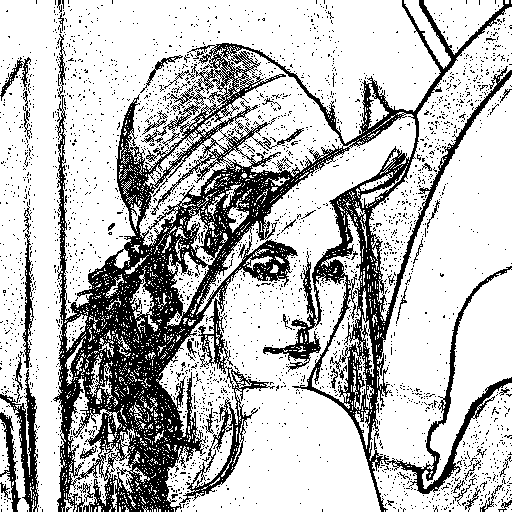

In [ ]:
a1 = roberts_operator(img, 12)
cv2.imwrite('a.roberts_operator.threshold=12.bmp', a1)
cv2_imshow(a1)

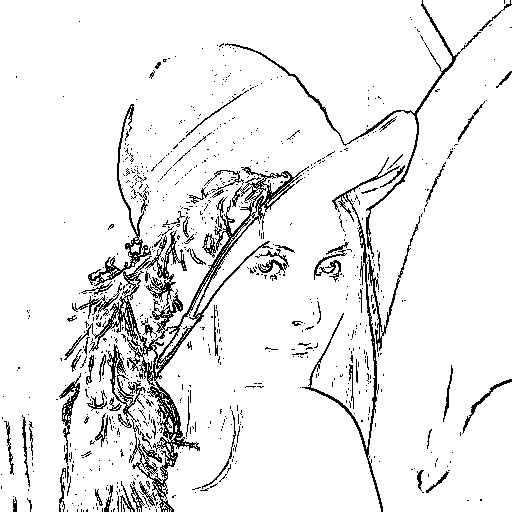

In [ ]:
a2 = roberts_operator(img, 30)
cv2.imwrite('a.roberts_operator.threshold=30.bmp', a2)
cv2_imshow(a2)

##(b) Prewitt operator ( Threshold = 24 )

In [ ]:
def prewitt_operator(img,threshold):
    padded_image = np.asarray(cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT), dtype=int) #convert the input to an array
    p1 = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]]) #Prewitt Cross convolution kernels (1st mask)
    p2 = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]]) #Prewitt Cross convolution kernels (2nd mask)
    M = img.shape[0] #height
    N = img.shape[1] #width
    gradient_image = np.zeros((M, N), int)
    for i in range(1, M+1):
        for j in range(1, N+1):
            gradient_magnitude_square  = convolution(padded_image[i-1:i+2, j-1:j+2], p1) ** 2
            gradient_magnitude_square += convolution(padded_image[i-1:i+2, j-1:j+2], p2) ** 2
            if gradient_magnitude_square >= threshold ** 2:
                gradient_image[ i-1, j-1 ] = MIN_PIXEL_VALUE
            else:
                gradient_image[ i-1, j-1 ] = MAX_PIXEL_VALUE
    return gradient_image

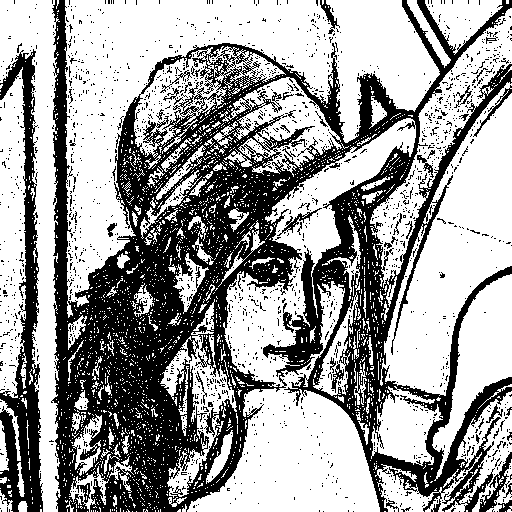

In [ ]:
b = prewitt_operator(img, 24)
cv2.imwrite('b.prewitt_operator.threshold=24.bmp', b)
cv2_imshow(b)

##(c) Sobel's Edge Detector ( threshold = 38 )

In [ ]:
def sobel_operator(img,threshold):
    padded_image = np.asarray(cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT), dtype=int) #convert the input to an array
    s1 = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]) #sobel Cross convolution kernels (1st mask)
    s2 = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]]) #sobel Cross convolution kernels (2nd mask)
    M = img.shape[0] #height
    N = img.shape[1] #width
    gradient_image = np.zeros((M, N), int)
    for i in range(1, M+1):
        for j in range(1, N+1):
            gradient_magnitude_square  = convolution(padded_image[i-1:i+2, j-1:j+2], s1) ** 2
            gradient_magnitude_square += convolution(padded_image[i-1:i+2, j-1:j+2], s2) ** 2
            if gradient_magnitude_square >= threshold ** 2:
                gradient_image[ i-1, j-1 ] = MIN_PIXEL_VALUE
            else:
                gradient_image[ i-1, j-1 ] = MAX_PIXEL_VALUE
    return gradient_image

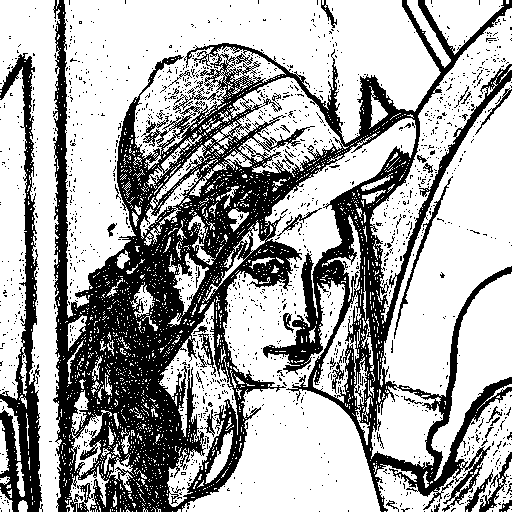

In [ ]:
c = sobel_operator(img, 38)
cv2.imwrite('c.sobel_operator.threshold=38.bmp', c)
cv2_imshow(c)

### (d) Frei and Chen's Gradient Operator ( threshold = 30 )

In [ ]:
def frei_and_chen_gradient_operator(img,threshold):
    padded_image = np.asarray(cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT), dtype=int) #convert the input to an array
    f1 = np.array([[-1, -np.sqrt(2), -1],[0, 0, 0],[1, np.sqrt(2), 1]])
    f2 = np.array([[-1, 0, 1],[-np.sqrt(2), 0, np.sqrt(2)],[-1, 0, 1]])
    M = img.shape[0] #height
    N = img.shape[1] #width
    gradient_image = np.zeros((M, N), int)
    for i in range(1, M+1):
        for j in range(1, N+1):
            gradient_magnitude_square  = convolution(padded_image[i-1:i+2, j-1:j+2], f1) ** 2
            gradient_magnitude_square += convolution(padded_image[i-1:i+2, j-1:j+2], f2) ** 2
            if gradient_magnitude_square >= threshold ** 2:
                gradient_image[ i-1, j-1 ] = MIN_PIXEL_VALUE
            else:
                gradient_image[ i-1, j-1 ] = MAX_PIXEL_VALUE
    return gradient_image

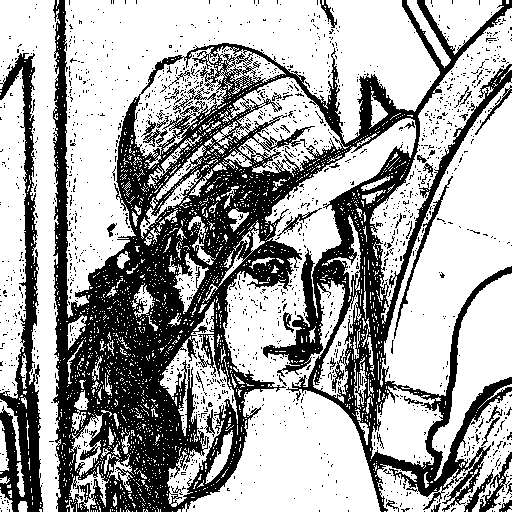

In [ ]:
d = frei_and_chen_gradient_operator(img, 30)
cv2.imwrite('d.frei_and_chen_gradient_operator.threshold=30.bmp', d)
cv2_imshow(d)

###(e) Kirsch's Compass Operator ( threshold = 135 )

In [ ]:
def kirschs_compass_operator(img,threshold):
    padded_image = np.asarray(cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT), dtype=int) #convert the input to an array
    k0 = np.array([[-3, -3, 5],[-3, 0, 5],[-3, -3, 5]])
    k1 = np.array([[-3, 5, 5],[-3, 0, 5],[-3, -3, -3]])
    k2 = np.array([[5, 5, 5],[-3, 0, -3],[-3, -3, -3]])
    k3 = np.array([[5, 5, -3],[5, 0, -3],[-3, -3, -3]])
    k4 = np.array([[5, -3, -3],[5, 0, -3],[5, -3, -3]])
    k5 = np.array([[-3, -3, -3],[5, 0, -3],[5, 5, -3]])
    k6 = np.array([[-3, -3, -3],[-3, 0, -3],[5, 5, 5]])
    k7 = np.array([[-3, -3, -3],[-3, 0, 5],[-3, 5, 5]])
    M = img.shape[0] #height
    N = img.shape[1] #width
    gradient_image = np.zeros((M, N), int)
    for i in range(1, M+1):
        for j in range(1, N+1):
            gradient_magnitude_square =        convolution(padded_image[i-1:i+2, j-1:j+2], k0)
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k1), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k2), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k3), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k4), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k5), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k6), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k7), gradient_magnitude_square )
            if gradient_magnitude_square >= threshold:
                gradient_image[ i-1, j-1 ] = MIN_PIXEL_VALUE
            else:
                gradient_image[ i-1, j-1 ] = MAX_PIXEL_VALUE
    return gradient_image

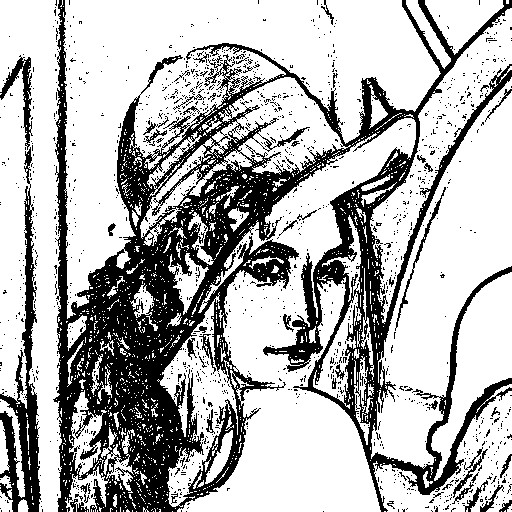

In [ ]:
e = kirschs_compass_operator(img, 135)
cv2.imwrite('e.kirschs_compass_operator.threshold=135.bmp', e)
cv2_imshow(e)

###(f) Robinson's Compass Operator ( threshold = 43 )

In [ ]:
def robinshons_compass_operator(img,threshold):
    padded_image = np.asarray(cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_REFLECT), dtype=int) #convert the input to an array
    k0 = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    k1 = np.array([[0, 1, 2],[-1, 0, 1],[-2, -1, 0]])
    k2 = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
    k3 = np.array([[2, 1, 0],[1, 0, -1],[0, -1, -2]])
    k4 = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
    k5 = np.array([[0, -1, -2],[1, 0, -1],[2, 1, 0]])
    k6 = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    k7 = np.array([[-2, -1, 0],[-1, 0, 1],[0, 1, 2]])
    M = img.shape[0] #height
    N = img.shape[1] #width
    gradient_image = np.zeros((M, N), int)
    for i in range(1, M+1):
        for j in range(1, N+1):
            gradient_magnitude_square =        convolution(padded_image[i-1:i+2, j-1:j+2], k0)
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k1), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k2), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k3), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k4), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k5), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k6), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-1:i+2, j-1:j+2], k7), gradient_magnitude_square )
            if gradient_magnitude_square >= threshold:
                gradient_image[ i-1, j-1 ] = MIN_PIXEL_VALUE
            else:
                gradient_image[ i-1, j-1 ] = MAX_PIXEL_VALUE
    return gradient_image

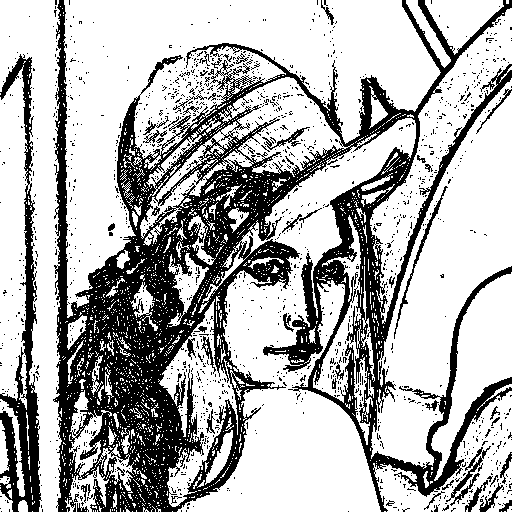

In [ ]:
f = robinshons_compass_operator(img, 43)
cv2.imwrite('f.robinshons_compass_operator.threshold=43.bmp', f)
cv2_imshow(f)

###(g) Nevatia-Babu 5x5 Operator ( threshold = 12500 )

In [ ]:
def nevatia_babu_5_5_perator(img,threshold):
    padded_image = np.asarray(cv2.copyMakeBorder(img,2,2,2,2,cv2.BORDER_REFLECT), dtype=int) #convert the input to an array
    k0 = np.array([[100, 100, 100, 100, 100],[100, 100, 100, 100, 100],[0, 0, 0, 0, 0],[-100, -100, -100, -100, -100],[-100, -100, -100, -100, -100],])
    k1 = np.array([[100, 100, 100, 100, 100],[100, 100, 100, 78, -32],[100, 92, 0, -92, -100],[32, -78, -100, -100, -100],[-100, -100, -100, -100, -100]])
    k2 = np.array([[100, 100, 100, 32, -100],[100, 100, 92, -78, -100],[100, 100, 0, -100, -100],[100, 78, -92, -100, -100],[100, -32, -100, -100, -100]])
    k3 = np.array([[-100, -100, 0, 100, 100],[-100, -100, 0, 100, 100],[-100, -100, 0, 100, 100],[-100, -100, 0, 100, 100],[-100, -100, 0, 100, 100]])
    k4 = np.array([[-100, 32, 100, 100, 100],[-100, -78, 92, 100, 100],[-100, -100, 0, 100, 100],[-100, -100, -92, 78, 100],[-100, -100, -100, -32, 100]])
    k5 = np.array([[100, 100, 100, 100, 100],[-32, 78, 100, 100, 100],[-100, -92, 0, 92, 100],[-100, -100, -100, -78, 32],[-100, -100, -100, -100, -100]])
    M = img.shape[0] #height
    N = img.shape[1] #width
    gradient_image = np.zeros((M, N), int)
    for i in range(2, M+2):
        for j in range(2, N+2):
            gradient_magnitude_square =        convolution(padded_image[i-2:i+3, j-2:j+3], k0)
            gradient_magnitude_square = max ( convolution(padded_image[i-2:i+3, j-2:j+3], k1), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-2:i+3, j-2:j+3], k2), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-2:i+3, j-2:j+3], k3), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-2:i+3, j-2:j+3], k4), gradient_magnitude_square )
            gradient_magnitude_square = max ( convolution(padded_image[i-2:i+3, j-2:j+3], k5), gradient_magnitude_square )
            if gradient_magnitude_square >= threshold:
                gradient_image[ i-2, j-2 ] = MIN_PIXEL_VALUE
            else:
                gradient_image[ i-2, j-2 ] = MAX_PIXEL_VALUE
    return gradient_image

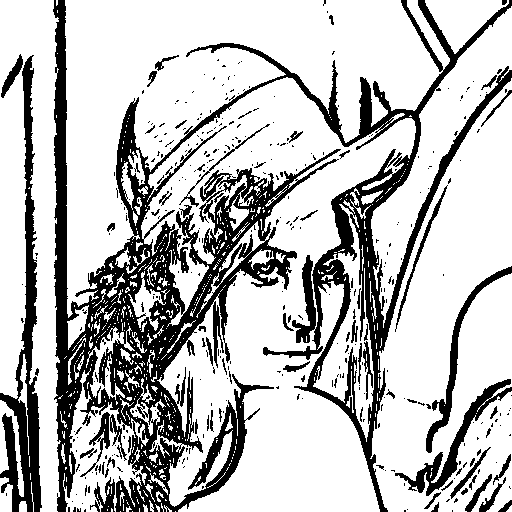

In [ ]:
g = nevatia_babu_5_5_perator(img, 12500)
cv2.imwrite('g.nevatia_babu_5_5_perator.threshold=12500.bmp', g)
cv2_imshow(g)

9


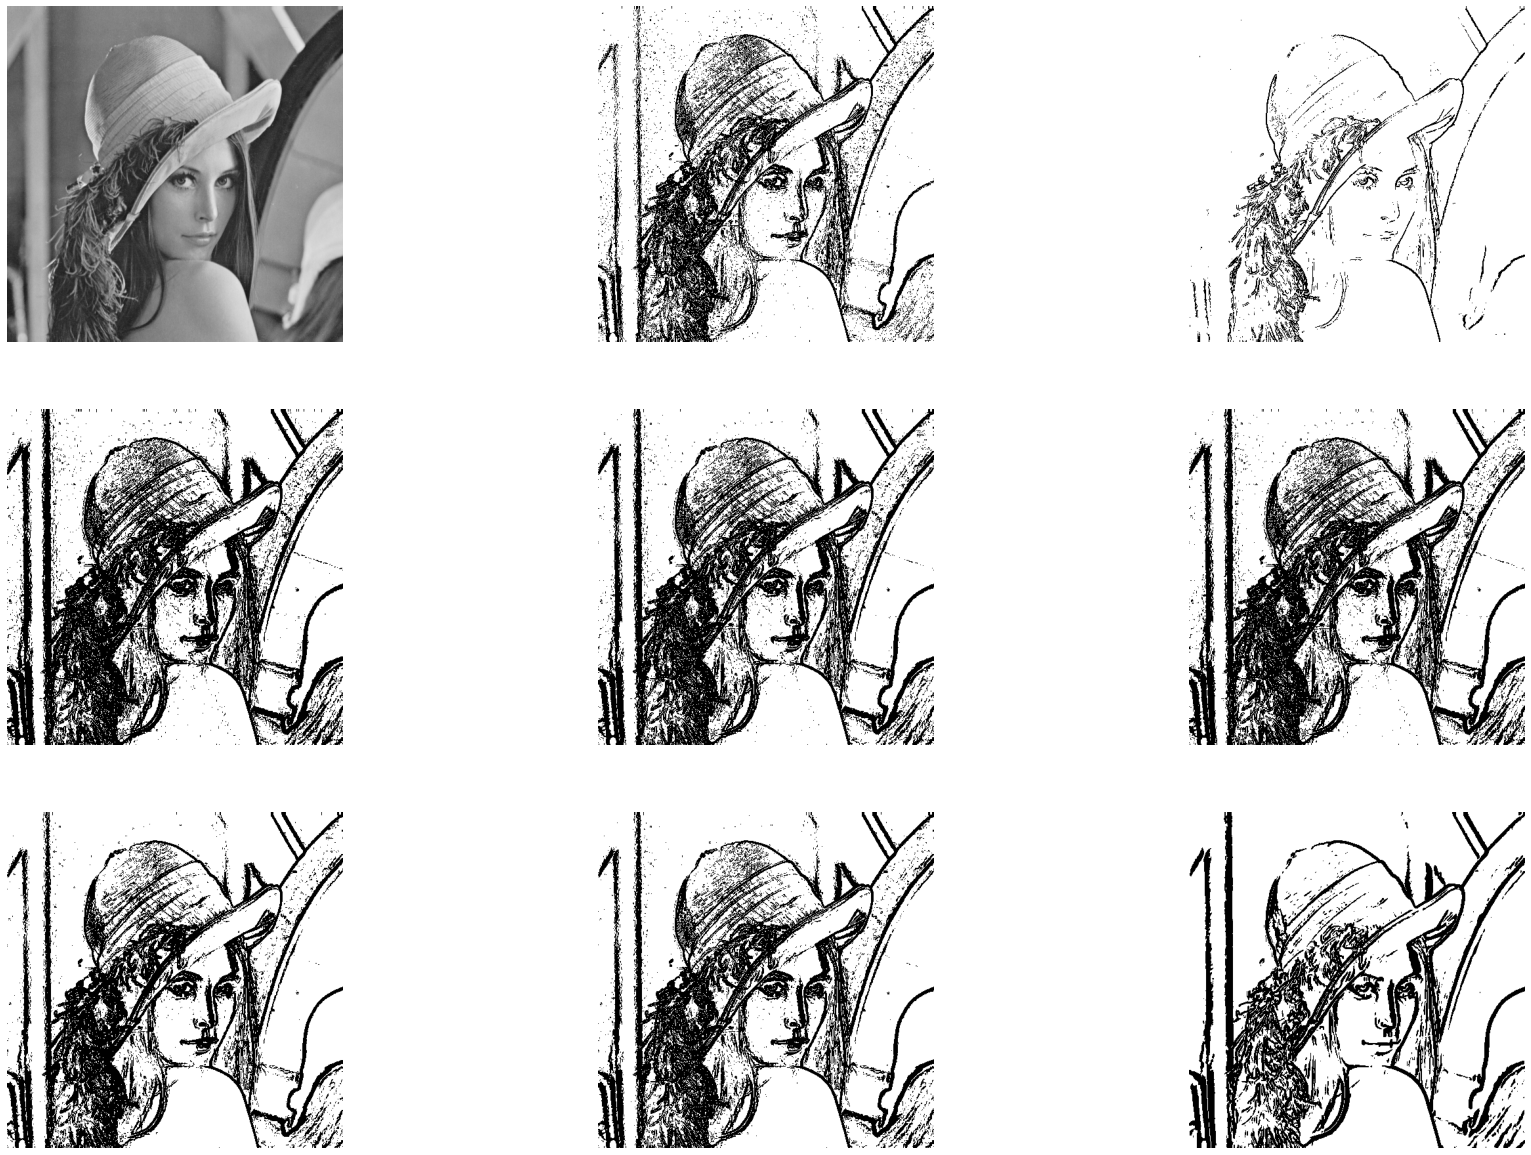

In [ ]:
# create figure
fig = plt.figure(figsize=(30, 21))

# setting values to rows and column variables
rows = 3
columns = 3

problemList = ['lena.bmp','a.roberts_operator.threshold=12.bmp','a.roberts_operator.threshold=30.bmp','b.prewitt_operator.threshold=24.bmp','c.sobel_operator.threshold=38.bmp','d.frei_and_chen_gradient_operator.threshold=30.bmp','e.kirschs_compass_operator.threshold=135.bmp','f.robinshons_compass_operator.threshold=43.bmp','g.nevatia_babu_5_5_perator.threshold=12500.bmp']
print(len(problemList))
for i, element in enumerate(problemList):
    fig.add_subplot(rows, columns, i+1 )
    plt.imshow(cv2.imread(element))
    plt.axis('off')
plt.savefig('final_result.png')